# Titanic - Aprendizado de máquina a partir de desastres

O objetivo desse modelo é descobrir, por meio de aprendizagem de máquina, quais sobreviventes sobreviveram ao desastre do Titanic.

## 1 - Download das bibliotecas básicas.

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer

## 2 - Carregamento de exploração das bases de dados

In [181]:
base_treinamento = pd.read_csv('train.csv')
base_teste = pd.read_csv('test.csv')

In [182]:
base_treinamento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [183]:
base_teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 2.1 - Exploraçao da Base de treinamento 

In [184]:
# A base de treinamento 891 linhas. Desse total de linhas, a coluna Age, embarked e cabin, são as que apresentam dados faltantes.
base_treinamento.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [185]:
base_treinamento.isnull().sum()/len(base_treinamento)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Observando o percentual de dados faltantes por coluna, foi percebido que a coluna Cabin deve ser excluída do modelo de dados, por 77% dos seus dados 
estarem faltando. Deve ser usado a moda para substituir os dados faltantes na coluna embarked, por ter somente 2 dados faltando, e em relação a coluna Age, será analisado como os outros atributos influenciam a sobrevivência para saber qual é a melhor forma de tratar os dados faltantes.

In [186]:
print(base_treinamento.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Ao analisar os tipos dos atributos, foi percebido que há a necessidade de mudar os seus tipos, pois a maioria foi classificada de forma incorreta.

### 2.2 - Pré-tratamento de dados

O objetivo é fazer um tratamento rápido que facilite a vizualição dos daddos e as análises, dessa forma, será possível escolher qual caminho seguir, para determinar quais passageiros sobreviveram, com mais exatidão.

In [187]:
base_treinamento['Survived'] = base_treinamento['Survived'].replace({1:'Sim', 0:'Não'})  # O 1 mudou para sim e o 0 para não
base_treinamento['PassengerId'] = base_treinamento['PassengerId'].astype('object') # Mudei o tipo do Id de int para object
base_treinamento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Não,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Não,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Sim,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,Não,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Sim,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [188]:
print(base_treinamento.dtypes)

PassengerId     object
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [189]:
base_treinamento.loc[(base_treinamento['Pclass'] == 3) & (base_treinamento['Cabin'].notnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,Sim,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
75,76,Não,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
128,129,Sim,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
205,206,Não,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,Não,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
394,395,Sim,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
429,430,Sim,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
699,700,Não,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
715,716,Não,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
751,752,Sim,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


In [190]:
base_treinamento.loc[(base_treinamento['Pclass'] == 2) & (base_treinamento['Cabin'].notnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,Sim,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
66,67,Sim,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
123,124,Sim,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
148,149,Não,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
183,184,Sim,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
193,194,Sim,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
292,293,Não,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
303,304,Sim,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
327,328,Sim,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
340,341,Sim,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S


### Taramento na base treinamento

In [193]:
moda_cabine_primeira_classe = base_treinamento.loc[base_treinamento['Pclass'] == 1, 'Cabin'].mode()[0]
moda_cabine_segunda_classe = base_treinamento.loc[base_treinamento['Pclass'] == 2, 'Cabin'].mode()[0]
moda_cabine_terceira_classe = base_treinamento.loc[base_treinamento['Pclass'] == 3, 'Cabin'].mode()[0]


base_treinamento.loc[(base_treinamento['Pclass'] == 1) & (base_treinamento['Cabin'].isnull()), 'Cabin'] = moda_cabine_primeira_classe
base_treinamento.loc[(base_treinamento['Pclass'] == 2) & (base_treinamento['Cabin'].isnull()), 'Cabin'] = moda_cabine_segunda_classe
base_treinamento.loc[(base_treinamento['Pclass'] == 3) & (base_treinamento['Cabin'].isnull()), 'Cabin'] = moda_cabine_terceira_classe

base_treinamento.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [194]:
base_treinamento['AndarNoNavio'] = base_treinamento['Cabin'].str[0]

In [195]:
base_treinamento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AndarNoNavio
0,1,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,G
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,G
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,Não,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Não,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,D,S,D
887,888,Sim,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,Não,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,G6,S,G
889,890,Sim,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


### Tratamento na base treinamento

In [196]:
moda_cabine_primeira_classe = base_teste.loc[base_teste['Pclass'] == 1, 'Cabin'].mode()[0]
moda_cabine_segunda_classe = base_teste.loc[base_teste['Pclass'] == 2, 'Cabin'].mode()[0]
moda_cabine_terceira_classe = base_teste.loc[base_teste['Pclass'] == 3, 'Cabin'].mode()[0]


base_teste.loc[(base_teste['Pclass'] == 1) & (base_teste['Cabin'].isnull()), 'Cabin'] = moda_cabine_primeira_classe
base_teste.loc[(base_teste['Pclass'] == 2) & (base_teste['Cabin'].isnull()), 'Cabin'] = moda_cabine_segunda_classe
base_teste.loc[(base_teste['Pclass'] == 3) & (base_teste['Cabin'].isnull()), 'Cabin'] = moda_cabine_terceira_classe

base_treinamento.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          2
AndarNoNavio      0
dtype: int64

In [197]:
base_teste['AndarNoNavio'] = base_teste['Cabin'].str[0]

In [199]:
base_teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AndarNoNavio
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,F E46,Q,F
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,F E46,S,F
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,F4,Q,F
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,F E46,S,F
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,F E46,S,F
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,F E46,S,F
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,F E46,S,F
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,F E46,S,F


### 2.2 - Visualizações

<Axes: xlabel='Survived', ylabel='count'>

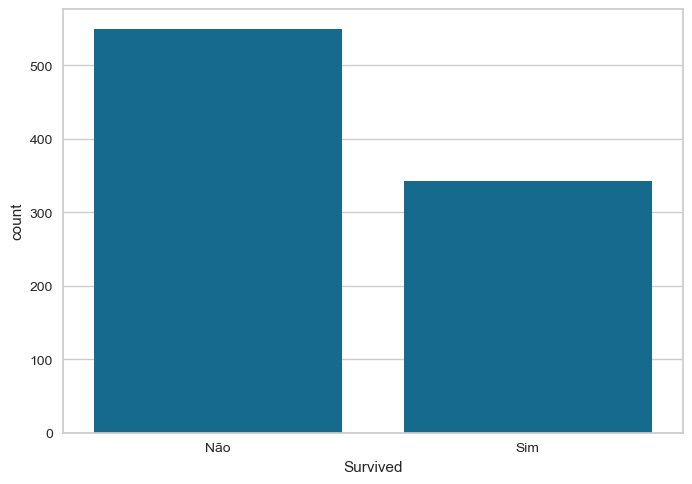

In [200]:
# Vizualização de quantos passageiros sobreviveram

sns.countplot(x = base_treinamento['Survived'], fill=True)

In [201]:
titanic_sobreviventes = base_treinamento.loc[base_treinamento['Survived'] =='Sim']
titanic_mortos = base_treinamento.loc[base_treinamento['Survived'] =='Não']

In [202]:
titanic_sobreviventes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AndarNoNavio
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,G
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
8,9,Sim,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S,G
9,10,Sim,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,D,C,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,Sim,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,G6,C,G
879,880,Sim,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,C
880,881,Sim,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,D,S,D
887,888,Sim,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B


In [203]:
titanic_mortos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AndarNoNavio
0,1,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,G
4,5,Não,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,G
5,6,Não,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,G6,Q,G
6,7,Não,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
7,8,Não,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,Não,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,G6,S,G
885,886,Não,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,G6,Q,G
886,887,Não,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,D,S,D
888,889,Não,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,G6,S,G


#### 2.2.1 Análise dos passageiros que sobreviveram

Após analisar quantos passageiros sobreviveram e morreram, foi feito a divisão na base de dados para fazer uma análise mais aprofundada sobre o perfil dos passageiros que morreram e o perfil dos que sobreviveram.

<Axes: xlabel='Sex', ylabel='count'>

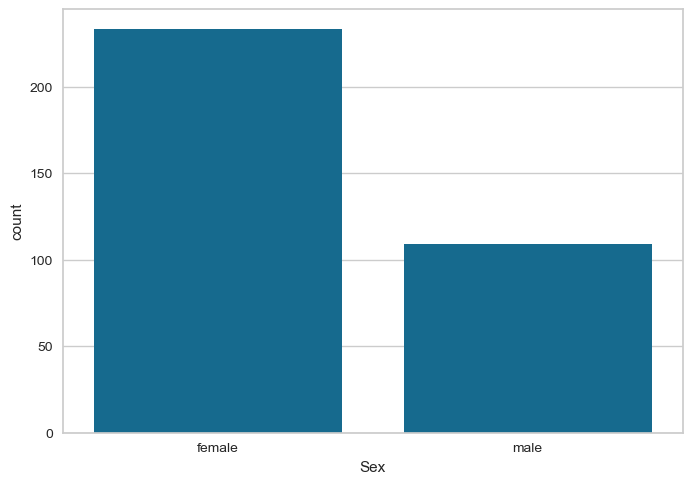

In [204]:
sns.countplot(titanic_sobreviventes, x = 'Sex')

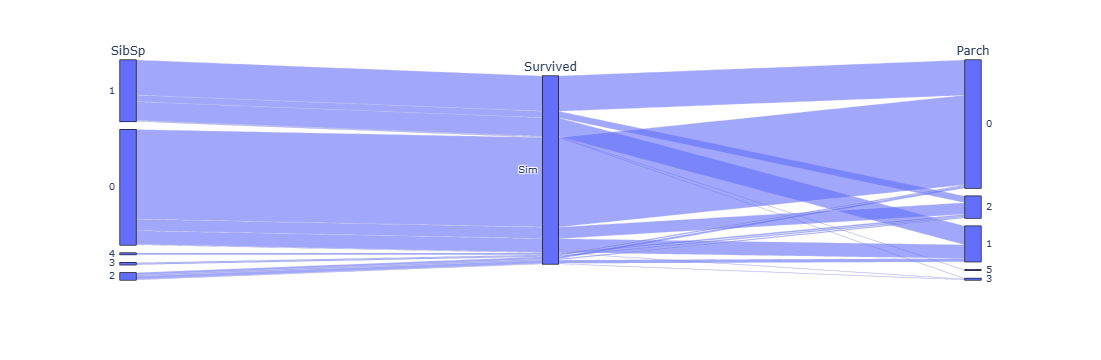

In [205]:
fig = px.parallel_categories(titanic_sobreviventes, dimensions= ['SibSp', 'Survived', 'Parch'])
fig.show()

#### 2.2.2 Análise dos passageiros que morreram

Após analisar quantos passageiros sobreviveram e morreram, foi feito a divisão na base de dados para fazer uma análise mais aprofundada sobre o perfil dos passageiros que morreram e o perfil dos que sobreviveram.

<Axes: xlabel='Sex', ylabel='count'>

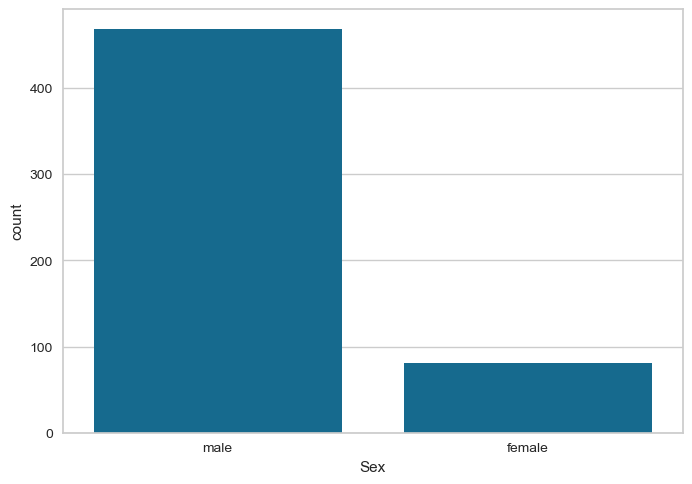

In [206]:
sns.countplot(titanic_mortos, x = 'Sex')

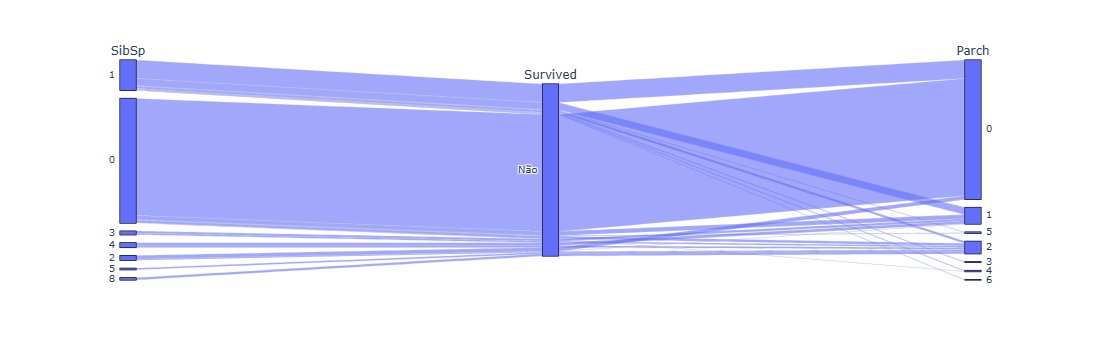

In [207]:
fig = px.parallel_categories(titanic_mortos, dimensions= ['SibSp', 'Survived', 'Parch'])
fig.show()

#### 2.2.3 - Analises feitas em conjunto entre mortos e sobreviventes

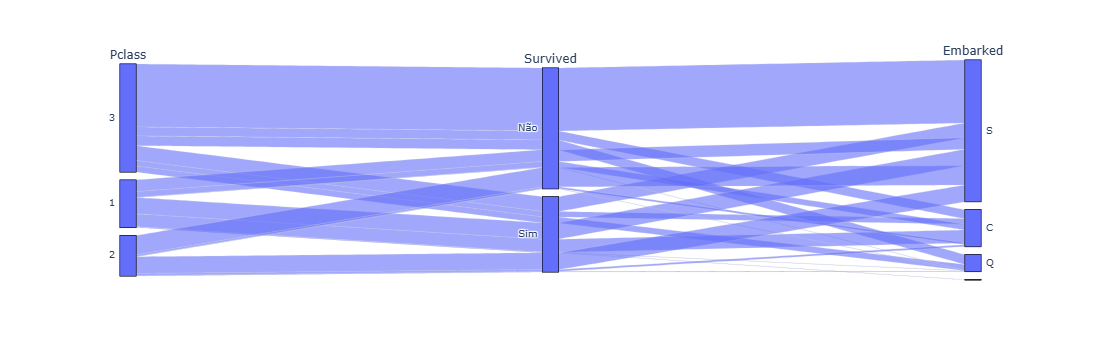

In [208]:
fig = px.parallel_categories(base_treinamento, dimensions= ['Pclass', 'Survived', 'Embarked'])
fig.show()

## 3 - Tratamento dos dados

### 3.1 - Tratamento de Valores Nulos

#### 3.1.1 - Base_treinamento

In [209]:
base_treinamento.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          2
AndarNoNavio      0
dtype: int64

In [210]:
base_treinamento.isnull().sum()/len(base_treinamento)*100

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age             19.865320
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.000000
Embarked         0.224467
AndarNoNavio     0.000000
dtype: float64

In [211]:
base_treinamento.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
base_treinamento

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AndarNoNavio
0,1,Não,3,male,22.0,1,0,7.2500,S,G
1,2,Sim,1,female,38.0,1,0,71.2833,C,C
2,3,Sim,3,female,26.0,0,0,7.9250,S,G
3,4,Sim,1,female,35.0,1,0,53.1000,S,C
4,5,Não,3,male,35.0,0,0,8.0500,S,G
...,...,...,...,...,...,...,...,...,...,...
886,887,Não,2,male,27.0,0,0,13.0000,S,D
887,888,Sim,1,female,19.0,0,0,30.0000,S,B
888,889,Não,3,female,NaN,1,2,23.4500,S,G
889,890,Sim,1,male,26.0,0,0,30.0000,C,C


In [212]:
mediana_idade = base_treinamento['Age'].median()
moda_embarked = base_treinamento['Embarked'].mode()[0]
base_treinamento['Age'].fillna(mediana_idade, inplace=True)
base_treinamento['Embarked'].fillna(moda_embarked, inplace=True)
base_treinamento

C:\Users\caien\AppData\Local\Temp\ipykernel_25660\3170701125.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\caien\AppData\Local\Temp\ipykernel_25660\3170701125.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AndarNoNavio
0,1,Não,3,male,22.0,1,0,7.2500,S,G
1,2,Sim,1,female,38.0,1,0,71.2833,C,C
2,3,Sim,3,female,26.0,0,0,7.9250,S,G
3,4,Sim,1,female,35.0,1,0,53.1000,S,C
4,5,Não,3,male,35.0,0,0,8.0500,S,G
...,...,...,...,...,...,...,...,...,...,...
886,887,Não,2,male,27.0,0,0,13.0000,S,D
887,888,Sim,1,female,19.0,0,0,30.0000,S,B
888,889,Não,3,female,28.0,1,2,23.4500,S,G
889,890,Sim,1,male,26.0,0,0,30.0000,C,C


#### 3.1.2 - Base teste

In [213]:
base_teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AndarNoNavio
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,F E46,Q,F
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,F E46,S,F
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,F4,Q,F
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,F E46,S,F
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,F E46,S,F
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,F E46,S,F
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,F E46,S,F
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,F E46,S,F


In [214]:
base_teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
AndarNoNavio     0
dtype: int64

In [215]:
base_teste.isnull().sum()/len(base_teste)*100

PassengerId      0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age             20.574163
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.239234
Cabin            0.000000
Embarked         0.000000
AndarNoNavio     0.000000
dtype: float64

In [216]:
base_teste.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
base_teste

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AndarNoNavio
0,892,3,male,34.5,0,0,7.8292,Q,F
1,893,3,female,47.0,1,0,7.0000,S,F
2,894,2,male,62.0,0,0,9.6875,Q,F
3,895,3,male,27.0,0,0,8.6625,S,F
4,896,3,female,22.0,1,1,12.2875,S,F
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,F
414,1306,1,female,39.0,0,0,108.9000,C,C
415,1307,3,male,38.5,0,0,7.2500,S,F
416,1308,3,male,NaN,0,0,8.0500,S,F


In [217]:
mediana_idade = base_teste['Age'].median()
mediana_fare = base_teste['Fare'].median()
base_teste['Age'].fillna(mediana_idade, inplace=True)
base_teste['Fare'].fillna(mediana_fare, inplace=True)
base_teste.isnull().sum()

C:\Users\caien\AppData\Local\Temp\ipykernel_25660\1407831470.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\caien\AppData\Local\Temp\ipykernel_25660\1407831470.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

PassengerId     0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
AndarNoNavio    0
dtype: int64

## 4 - Pré-processamento dos dados

In [218]:
X_base_treinamento = base_treinamento.iloc[:, 2:]
X_base_treinamento

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AndarNoNavio
0,3,male,22.0,1,0,7.2500,S,G
1,1,female,38.0,1,0,71.2833,C,C
2,3,female,26.0,0,0,7.9250,S,G
3,1,female,35.0,1,0,53.1000,S,C
4,3,male,35.0,0,0,8.0500,S,G
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,D
887,1,female,19.0,0,0,30.0000,S,B
888,3,female,28.0,1,2,23.4500,S,G
889,1,male,26.0,0,0,30.0000,C,C


In [219]:
y_base_treinamento = base_treinamento.iloc[:, 1]
y_base_treinamento

0      Não
1      Sim
2      Sim
3      Sim
4      Não
      ... 
886    Não
887    Sim
888    Não
889    Sim
890    Não
Name: Survived, Length: 891, dtype: object

In [220]:
X_base_teste = base_teste.iloc[:, 1:]
X_base_teste

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AndarNoNavio
0,3,male,34.5,0,0,7.8292,Q,F
1,3,female,47.0,1,0,7.0000,S,F
2,2,male,62.0,0,0,9.6875,Q,F
3,3,male,27.0,0,0,8.6625,S,F
4,3,female,22.0,1,1,12.2875,S,F
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,F
414,1,female,39.0,0,0,108.9000,C,C
415,3,male,38.5,0,0,7.2500,S,F
416,3,male,27.0,0,0,8.0500,S,F


In [221]:
base_teste_treinamento = pd.concat([X_base_treinamento, X_base_teste])
base_teste_treinamento

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AndarNoNavio
0,3,male,22.0,1,0,7.2500,S,G
1,1,female,38.0,1,0,71.2833,C,C
2,3,female,26.0,0,0,7.9250,S,G
3,1,female,35.0,1,0,53.1000,S,C
4,3,male,35.0,0,0,8.0500,S,G
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,F
414,1,female,39.0,0,0,108.9000,C,C
415,3,male,38.5,0,0,7.2500,S,F
416,3,male,27.0,0,0,8.0500,S,F


In [222]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['criança', 'jovem', 'jovem adulto', 'adulto', 'idoso']

base_teste_treinamento['FaixaEtaria'] = pd.cut(base_teste_treinamento['Age'], bins=bins, labels=labels, right=False)
base_teste_treinamento

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AndarNoNavio,FaixaEtaria
0,3,male,22.0,1,0,7.2500,S,G,jovem adulto
1,1,female,38.0,1,0,71.2833,C,C,adulto
2,3,female,26.0,0,0,7.9250,S,G,jovem adulto
3,1,female,35.0,1,0,53.1000,S,C,adulto
4,3,male,35.0,0,0,8.0500,S,G,adulto
...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,F,jovem adulto
414,1,female,39.0,0,0,108.9000,C,C,adulto
415,3,male,38.5,0,0,7.2500,S,F,adulto
416,3,male,27.0,0,0,8.0500,S,F,jovem adulto


In [223]:
from sklearn.preprocessing import LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()
label_encoder_andarnonavio = LabelEncoder()
label_encoder_faixaetaria = LabelEncoder()

In [224]:
base_teste_treinamento['Sex'] = label_encoder_sex.fit_transform(base_teste_treinamento['Sex'])
base_teste_treinamento['Embarked'] = label_encoder_sex.fit_transform(base_teste_treinamento['Embarked'])
base_teste_treinamento['AndarNoNavio'] = label_encoder_andarnonavio.fit_transform(base_teste_treinamento['AndarNoNavio'])
base_teste_treinamento['FaixaEtaria'] = label_encoder_sex.fit_transform(base_teste_treinamento['FaixaEtaria'])
base_teste_treinamento

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AndarNoNavio,FaixaEtaria
0,3,1,22.0,1,0,7.2500,2,6,4
1,1,0,38.0,1,0,71.2833,0,2,0
2,3,0,26.0,0,0,7.9250,2,6,4
3,1,0,35.0,1,0,53.1000,2,2,0
4,3,1,35.0,0,0,8.0500,2,6,0
...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2,5,4
414,1,0,39.0,0,0,108.9000,0,2,0
415,3,1,38.5,0,0,7.2500,2,5,0
416,3,1,27.0,0,0,8.0500,2,5,4


In [225]:
base_teste_treinamento = base_teste_treinamento.values
base_teste_treinamento

array([[ 3. ,  1. , 22. , ...,  2. ,  6. ,  4. ],
       [ 1. ,  0. , 38. , ...,  0. ,  2. ,  0. ],
       [ 3. ,  0. , 26. , ...,  2. ,  6. ,  4. ],
       ...,
       [ 3. ,  1. , 38.5, ...,  2. ,  5. ,  0. ],
       [ 3. ,  1. , 27. , ...,  2. ,  5. ,  4. ],
       [ 3. ,  1. , 27. , ...,  0. ,  5. ,  4. ]])

In [226]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot_teste_treinamento = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(handle_unknown='ignore'), [0, 1,6 ,7, 8])], remainder = 'passthrough')
one_hot_teste_treinamento

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 [0, 1, 6, 7, 8])])

In [227]:
base_teste_treinamento = one_hot_teste_treinamento.fit_transform(base_teste_treinamento)
base_teste_treinamento

array([[ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [228]:
base_teste_treinamento[0]

array([ 0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25])

In [229]:
base_teste_treinamento.shape

(1309, 25)

## 5 - Escalonamento dos valores

In [230]:
from sklearn.preprocessing import StandardScaler

scaler_treinamento_teste = StandardScaler()
base_teste_treinamento = scaler_treinamento_teste.fit_transform(base_teste_treinamento)
base_teste_treinamento

array([[-0.57235147, -0.51808383,  0.91992518, ...,  0.48128777,
        -0.4449995 , -0.50329106],
       [ 1.74717818, -0.51808383, -1.08704492, ...,  0.48128777,
        -0.4449995 ,  0.73474365],
       [-0.57235147, -0.51808383,  0.91992518, ..., -0.47908676,
        -0.4449995 , -0.49024046],
       ...,
       [-0.57235147, -0.51808383,  0.91992518, ..., -0.47908676,
        -0.4449995 , -0.50329106],
       [-0.57235147, -0.51808383,  0.91992518, ..., -0.47908676,
        -0.4449995 , -0.48782368],
       [-0.57235147, -0.51808383,  0.91992518, ...,  0.48128777,
         0.71076309, -0.21118368]])

In [231]:
X_base_treinamento = base_teste_treinamento[:len(base_treinamento), :]
X_base_teste = base_teste_treinamento[len(base_treinamento):, :]

In [232]:
X_base_treinamento.shape, X_base_teste.shape

((891, 25), (418, 25))

In [233]:
base_treinamento.shape, base_teste.shape

((891, 10), (418, 9))

## 6 - Teste com algorítimos de classificação

### 6.1 - Divisão da base de treinamento

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_titanic_treinamento, X_titanic_teste, y_titanic_treinamento, y_titanic_teste = train_test_split(X_base_treinamento, y_base_treinamento, test_size=0.25, random_state=10)

In [236]:
X_titanic_treinamento.shape, y_titanic_treinamento.shape

((668, 25), (668,))

In [237]:
X_titanic_teste.shape, y_titanic_teste.shape

((223, 25), (223,))

### 6.2 - Naive bayes

In [238]:
from sklearn.naive_bayes import GaussianNB

In [239]:
naive_titanic_data = GaussianNB()

In [240]:
naive_titanic_data.fit(X_titanic_treinamento, y_titanic_treinamento)

GaussianNB()

In [241]:
previsoes = naive_titanic_data.predict(X_titanic_teste)
previsoes

array(['Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Sim', 'Sim',

In [242]:
y_titanic_teste

590    Não
131    Não
628    Não
195    Sim
230    Sim
      ... 
12     Não
203    Não
84     Sim
886    Não
759    Sim
Name: Survived, Length: 223, dtype: object

In [243]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [244]:
accuracy_score(y_titanic_teste, previsoes)

0.3632286995515695

In [245]:
confusion_matrix(y_titanic_teste, previsoes)

array([[  8, 139],
       [  3,  73]], dtype=int64)

In [246]:
from yellowbrick.classifier import ConfusionMatrix

0.3632286995515695

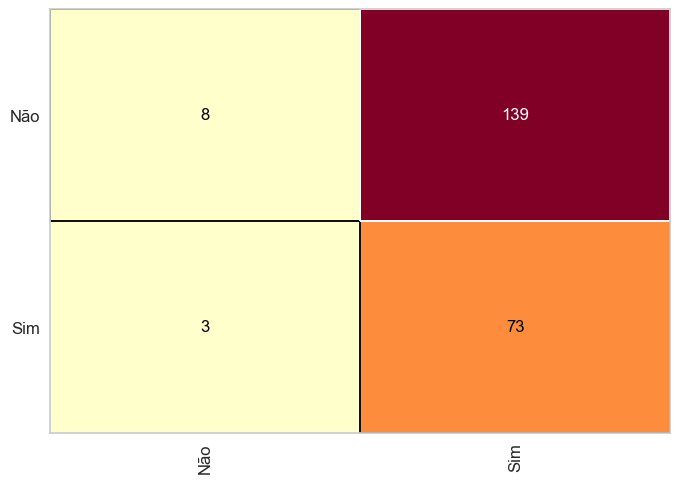

In [247]:
cm = ConfusionMatrix(naive_titanic_data)
cm.fit(X_titanic_treinamento, y_titanic_treinamento)
cm.score(X_titanic_teste, y_titanic_teste)

In [248]:
print(classification_report(y_titanic_teste, previsoes))

              precision    recall  f1-score   support

         Não       0.73      0.05      0.10       147
         Sim       0.34      0.96      0.51        76

    accuracy                           0.36       223
   macro avg       0.54      0.51      0.30       223
weighted avg       0.60      0.36      0.24       223



### 6.3 - Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
random_forest_titanic = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0,class_weight='balanced',)
random_forest_titanic.fit(X_titanic_treinamento, y_titanic_treinamento)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=150, random_state=0)

In [251]:
previsoes = random_forest_titanic.predict(X_titanic_teste)
previsoes

array(['Não', 'Não', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Não',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Sim', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Não',
       'Não', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Sim', 'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Não',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Não',

In [252]:
y_titanic_teste

590    Não
131    Não
628    Não
195    Sim
230    Sim
      ... 
12     Não
203    Não
84     Sim
886    Não
759    Sim
Name: Survived, Length: 223, dtype: object

In [253]:
accuracy_score(y_titanic_teste, previsoes)

0.8340807174887892

0.8340807174887892

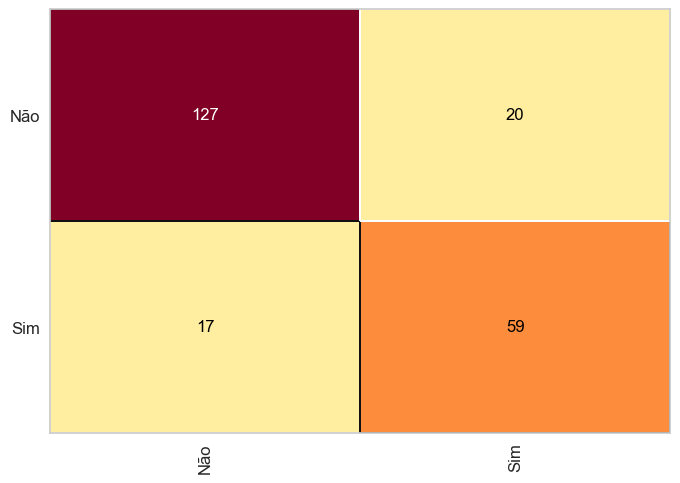

In [254]:
cm = ConfusionMatrix(random_forest_titanic)
cm.fit(X_titanic_treinamento, y_titanic_treinamento)
cm.score(X_titanic_teste, y_titanic_teste)

In [255]:
print(classification_report(y_titanic_teste, previsoes))

              precision    recall  f1-score   support

         Não       0.88      0.86      0.87       147
         Sim       0.75      0.78      0.76        76

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.84      0.83      0.83       223



## 7 - Submissão da base teste aos algoritimos

In [349]:
X_base_treinamento.shape, y_base_treinamento.shape

((891, 17), (891,))

In [351]:
X_base_teste.shape

(418, 17)

### 7.1 - Naive Bayes

In [352]:
naive_titanic_previsao = GaussianNB()

In [362]:
naive_titanic_previsao.fit(X_base_treinamento, y_base_treinamento)
previsoes = naive_titanic_previsao.predict(X_base_teste)
previsoes = pd.Series(previsoes)
previsoes = previsoes.replace({'Sim': 1, 'Não': 0})
previsoes

C:\Users\caien\AppData\Local\Temp\ipykernel_23444\2583951310.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [363]:
resultados = pd.DataFrame({
    'PassengerID': base_teste['PassengerId'],
    'Survived': previsoes
})

print(resultados.head())

   PassengerID  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [365]:
# resultados.to_csv('Resultado_Titanic.csv', index=False)

### 7.2 Random_Forest

In [366]:
random_forest_titanic_previsao = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0,class_weight='balanced')

In [369]:
random_forest_titanic_previsao.fit(X_base_treinamento, y_base_treinamento)
previsoes = random_forest_titanic_previsao.predict(X_base_teste)
previsoes

array(['Não', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Não', 'Sim',
       'Não', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Sim',
       'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Sim', 'Não',
       'Não', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Não',
       'Não', 'Sim', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não',
       'Sim', 'Não', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Não',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Sim',

In [370]:
previsoes = pd.Series(previsoes)
previsoes = previsoes.replace({'Sim': 1, 'Não': 0})
previsoes

C:\Users\caien\AppData\Local\Temp\ipykernel_23444\2165744068.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0      0
1      0
2      0
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Length: 418, dtype: int64

In [371]:
resultados = pd.DataFrame({
    'PassengerID': base_teste['PassengerId'],
    'Survived': previsoes
})

print(resultados.head())

   PassengerID  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0


In [374]:
resultados.to_csv('Resultado_Titanic_random_forest.csv', index=False)